In [1]:
import pandas as pd

In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [3]:
# Identify duplicate rows
duplicates = df[df.duplicated()]

# Display the duplicate rows
print(duplicates)

Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdmired, OfficeStackSyncHaveWorkedWith, OfficeStackSyncWan

In [5]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

# Display the first few rows after removal of duplicates
print(df_cleaned.head())

# Optionally, you can also verify the number of rows before and after removing duplicates
print(f"Original DataFrame size: {df.shape}")
print(f"Cleaned DataFrame size: {df_cleaned.shape}")

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

In [6]:
# Count the missing values for each column
missing_values = df.isnull().sum()

# Display the number of missing values for each column
print(missing_values)

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


In [7]:
# Count the missing values in the 'RemoteWork' column
missing_remotework = df['RemoteWork'].isnull().sum()

# Display the number of missing values in 'RemoteWork'
print(f"Number of missing values in 'RemoteWork' column: {missing_remotework}")

Number of missing values in 'RemoteWork' column: 10631


In [8]:
# Get the value counts for the 'RemoteWork' column
remote_work_counts = df['RemoteWork'].value_counts()

# Display the value counts
print(remote_work_counts)


RemoteWork
Hybrid (some remote, some in-person)    23015
Remote                                  20831
In-person                               10960
Name: count, dtype: int64


In [9]:
# Identify the most frequent value in the 'RemoteWork' column
most_frequent_remote_work = df['RemoteWork'].mode()[0]

# Display the most frequent value
print(most_frequent_remote_work)


Hybrid (some remote, some in-person)


In [11]:
# Impute missing values in the 'RemoteWork' column with the most frequent value
df['RemoteWork'] = df['RemoteWork'].fillna(most_frequent_remote_work)

# Verify that there are no missing values in 'RemoteWork'
print(df['RemoteWork'].isnull().sum())


0


       ConvertedCompYearly
count         2.343500e+04
mean          8.615529e+04
std           1.867570e+05
min           1.000000e+00
25%           3.271200e+04
50%           6.500000e+04
75%           1.079715e+05
max           1.625660e+07


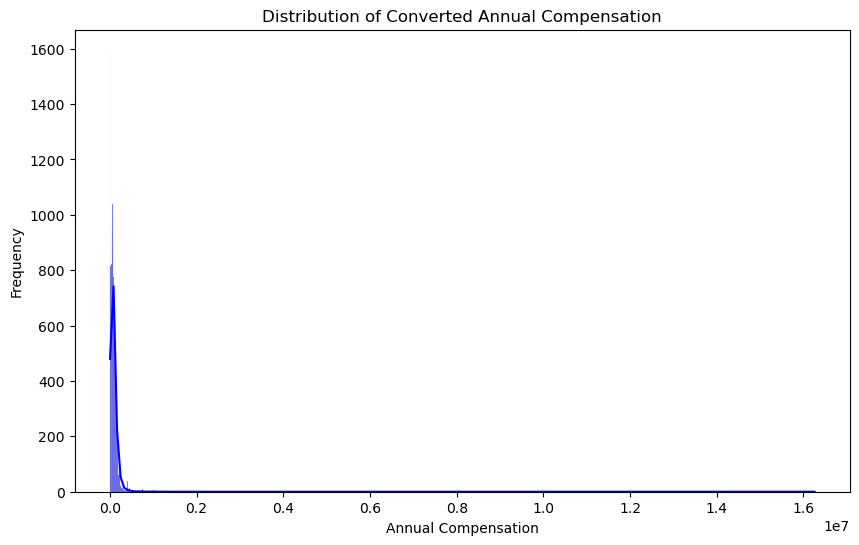

In [12]:
# Check for columns related to compensation
compensation_columns = ['ConvertedCompYearly']  # Add any other compensation-related columns if present

# Display summary statistics for compensation columns
compensation_data = df[compensation_columns]
print(compensation_data.describe())

# Visualize the distribution of compensation data
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram or boxplot to visualize the distribution of compensation data
plt.figure(figsize=(10, 6))
sns.histplot(compensation_data['ConvertedCompYearly'], kde=True, color='blue')
plt.title('Distribution of Converted Annual Compensation')
plt.xlabel('Annual Compensation')
plt.ylabel('Frequency')
plt.show()
